0.01
[[169.44128364 202.74551771 241.55662218]
 [169.92375817 203.25183939 242.48927976]
 [169.92375817 203.25183939 242.48927976]
 ...
 [ 55.22501733  82.88391099  20.76845524]
 [ 54.95407492  82.59957677  20.2447043 ]
 [ 56.76947692  84.50470822  23.7540055 ]]
[[[169.44128364 202.74551771 241.55662218]
  [169.92375817 203.25183939 242.48927976]
  [169.92375817 203.25183939 242.48927976]
  ...
  [171.59926517 205.01016128 245.72815397]
  [170.91710405 204.29428314 244.40948801]
  [170.91710405 204.29428314 244.40948801]]

 [[169.44128364 202.74551771 241.55662218]
  [169.92375817 203.25183939 242.48927976]
  [169.92375817 203.25183939 242.48927976]
  ...
  [171.59926517 205.01016128 245.72815397]
  [170.91710405 204.29428314 244.40948801]
  [170.91710405 204.29428314 244.40948801]]

 [[169.44128364 202.74551771 241.55662218]
  [169.92375817 203.25183939 242.48927976]
  [169.24159705 202.53596125 241.1706138 ]
  ...
  [171.59926517 205.01016128 245.72815397]
  [170.91710405 204.2942831

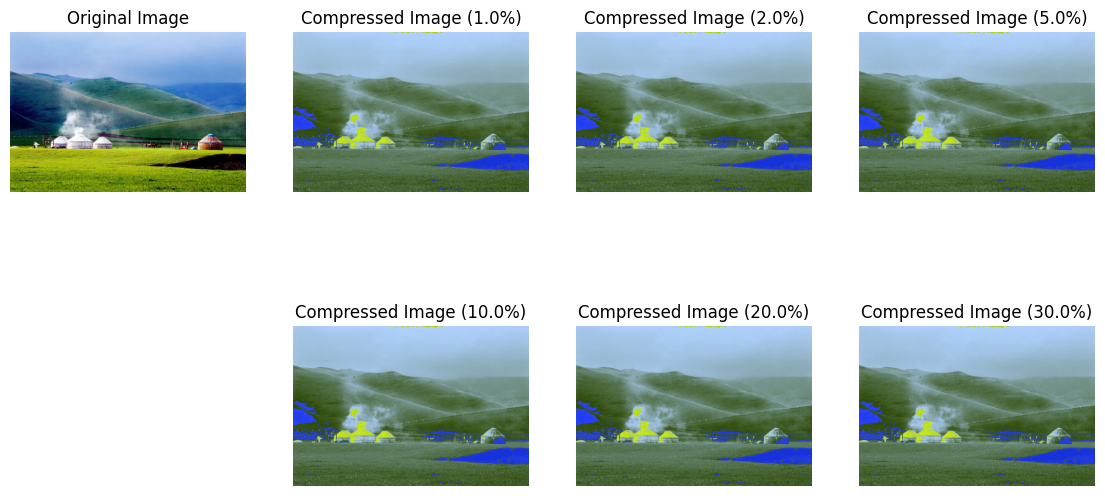

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

image = Image.open('压缩图片.png')
image_array = np.array(image)

# 铺平
image_flat = image_array.reshape(-1, image_array.shape[-1])


plt.figure(figsize=(14, 7))

plt.subplot(2, 4, 1)
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')

i=1
ncom=[0.01,0.02,0.05,0.1,0.2,0.3]
for n in ncom:
    print(n)
    pca = PCA(n_components=n)
    pca.fit(image_flat)
    image_pca = pca.transform(image_flat)

    # 恢复成原始维度
    image_re = pca.inverse_transform(image_pca)
    print(image_re)
    # 恢复成图像矩阵
    image_re = image_re.reshape(image_array.shape)
    print(image_re)
    if i<4:
        plt.subplot(2,4,i+1)
    else:
        plt.subplot(2,4,i+2)
    plt.imshow(image_re.astype(np.uint8))
    plt.title(f'Compressed Image ({n*100}%)')
    plt.axis('off')
    i+=1
plt.show()
